In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [45]:
fichierhotel = pd.read_csv('Hotel_Reservations.csv')

In [46]:
# Colonnes du dataset sous forme de liste python

In [47]:
list(fichierhotel.columns)

['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [48]:
# Décrivons d'abord les catégories de données du dataset qui sont quantitatives et catégorielles

In [49]:
# Dimensions du dataset

In [50]:
fichierhotel.shape

(36275, 19)

In [51]:
fichierhotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [52]:
#df = pd.DataFrame(data,columns=['name','salary'])

#df['name']= df['name'].replace(['michael','louis'],['karl','lionel'])

In [53]:
fichierhotel['booking_status'] = fichierhotel['booking_status'].replace(['Not_Canceled','Canceled'],['1','0'])

In [54]:
fichierhotel.booking_status

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: object

In [119]:
# la méthode value_counts nous renvoie le nombre d'occurences de chaque élément unique dans la liste

In [55]:
fichierhotel.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [56]:
fichierhotel.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [57]:
fichierhotel.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [58]:
fichierhotel.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [59]:
fichierhotel.avg_price_per_room.describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

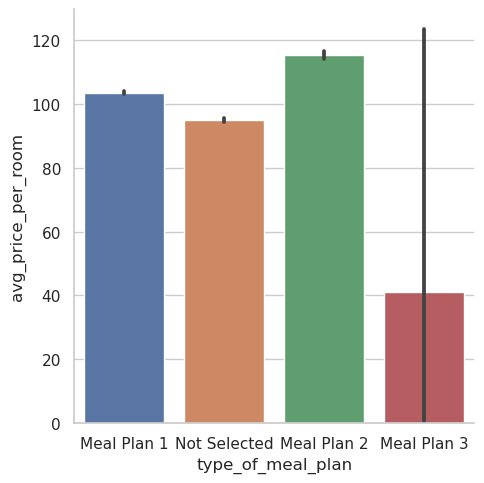

In [60]:
sns.catplot(x= 'type_of_meal_plan', y='avg_price_per_room', kind ='bar', data=fichierhotel)
plt.show()

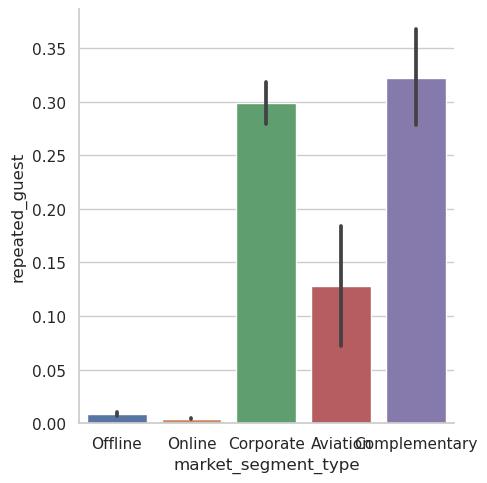

In [62]:
sns.catplot(x= 'market_segment_type', y='repeated_guest', kind ='bar', data=fichierhotel)
plt.show()

In [63]:
fichierhotel.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

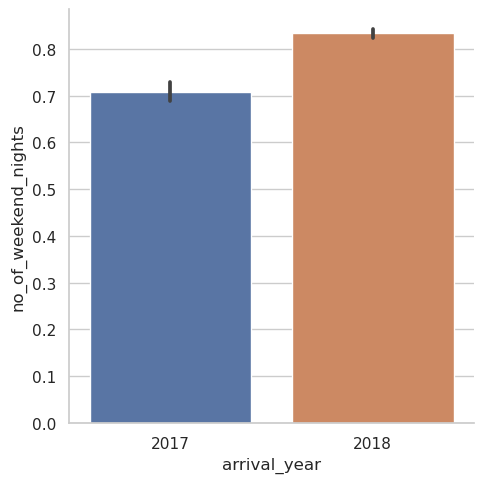

In [64]:
sns.catplot(x= 'arrival_year', y='no_of_weekend_nights', kind ='bar', data=fichierhotel)
plt.show()

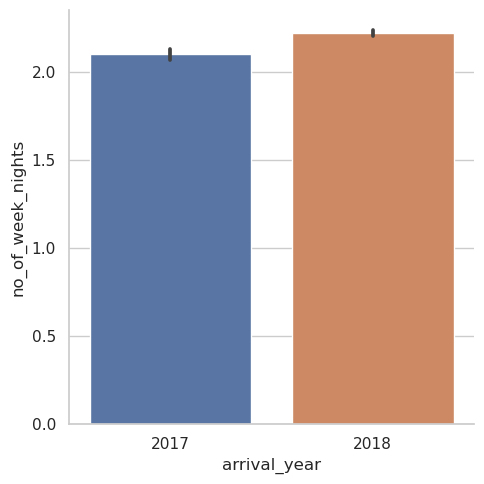

In [65]:
sns.catplot(x= 'arrival_year', y='no_of_week_nights', kind ='bar', data=fichierhotel)
plt.show()

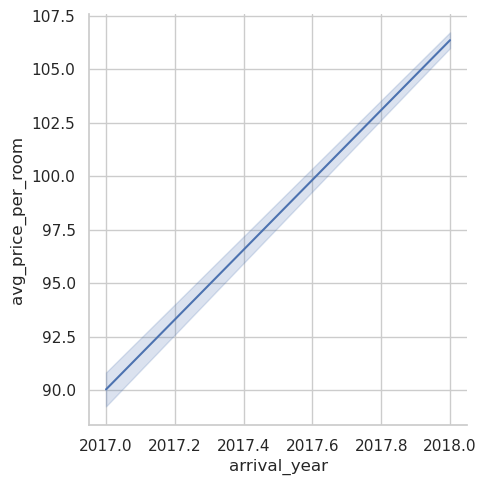

In [66]:
sns.relplot(x= 'arrival_year', y='avg_price_per_room', data=fichierhotel , kind = 'line' );
plt.show()

In [70]:
fichierhotel['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
# La méthode describe fournit les statistiques essentielles de la dataframe

In [74]:
fichierhotel.no_of_adults.describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

In [ ]:
# Il est naturel de ne s'intéresser que pour les adultes pour une première étude car ce sont les adultes qui paient
# Les enfants seront étudiés pus loin car ce sonty de futurs potentiels clients avec une bonne mémoire

In [83]:
print(type(fichierhotel['room_type_reserved'].values))
print(len(fichierhotel['room_type_reserved'].values))

<class 'numpy.ndarray'>
36275


In [78]:
fichierhotel['room_type_reserved'].values

array(['Room_Type 1', 'Room_Type 1', 'Room_Type 1', ..., 'Room_Type 1',
       'Room_Type 1', 'Room_Type 1'], dtype=object)

In [84]:
fichierhotel

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [79]:
fichierhotel[fichierhotel['room_type_reserved']=='Room_Type 1']

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [80]:
fichierhotel[fichierhotel['room_type_reserved']=='Room_Type 1'].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000
mean,1.770316,0.049378,0.779844,2.125133,0.027693,89.642943,2017.798969,7.445965,15.434447,0.028724,0.026129,0.169428,95.918532,0.557803
std,0.459726,0.228324,0.858207,1.375312,0.164094,90.860265,0.400778,3.097985,8.687151,0.167032,0.384185,1.878310,28.003094,0.749667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,16.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,78.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,59.000000,2018.000000,8.000000,15.000000,0.000000,0.000000,0.000000,94.500000,0.000000
75%,2.000000,0.000000,1.000000,3.000000,0.000000,138.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,112.200000,1.000000
max,3.000000,9.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [85]:
fichierhotel[fichierhotel['room_type_reserved']=='Room_Type 2'].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.0,692.000000,692.000000,692.000000
mean,1.579480,0.588150,0.929191,2.316474,0.049133,101.021676,2017.787572,6.998555,16.507225,0.010116,0.0,0.034682,87.848555,0.761561
std,0.794908,0.953038,0.873745,1.376720,0.216302,85.377079,0.409322,3.506248,8.702592,0.100139,0.0,0.359223,33.953959,0.824426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,32.000000,2018.000000,4.000000,9.000000,0.000000,0.0,0.000000,76.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,75.000000,2018.000000,8.000000,17.000000,0.000000,0.0,0.000000,85.225000,1.000000
75%,2.000000,2.000000,2.000000,3.000000,0.000000,166.000000,2018.000000,10.000000,24.000000,0.000000,0.0,0.000000,100.700000,1.000000
max,3.000000,9.000000,3.000000,10.000000,1.000000,381.000000,2018.000000,12.000000,31.000000,1.000000,0.0,5.000000,284.100000,4.000000


In [87]:
fichierhotel.groupby(['room_type_reserved']).mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
room_type_reserved,,,,,,,,,,,,,,
Room_Type 1,1.770316,0.049378,0.779844,2.125133,0.027693,89.642943,2017.798969,7.445965,15.434447,0.028724,0.026129,0.169428,95.918532,0.557803
Room_Type 2,1.579480,0.588150,0.929191,2.316474,0.049133,101.021676,2017.787572,6.998555,16.507225,0.010116,0.000000,0.034682,87.848555,0.761561
Room_Type 3,1.571429,0.000000,0.571429,2.000000,0.000000,69.571429,2017.571429,10.142857,15.142857,0.000000,0.000000,0.000000,73.678571,0.142857
Room_Type 4,2.192505,0.038138,0.933465,2.541027,0.037642,69.205712,2017.910187,7.335645,16.077266,0.011062,0.011227,0.059766,125.287317,0.842331
Room_Type 5,1.739623,0.132075,0.758491,2.196226,0.022642,59.547170,2017.924528,7.498113,15.611321,0.064151,0.018868,0.550943,123.733623,0.335849
Room_Type 6,1.994824,1.688406,0.883023,2.330228,0.068323,61.015528,2017.863354,7.546584,16.583851,0.010352,0.006211,0.078675,182.212836,0.904762
Room_Type 7,2.246835,0.797468,0.740506,2.151899,0.069620,37.094937,2017.917722,7.689873,16.101266,0.132911,0.208861,1.208861,155.198291,1.227848


In [89]:
fichierhotel.groupby(['market_segment_type']).mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
market_segment_type,,,,,,,,,,,,,,
Aviation,1.016000,0.000000,1.160000,2.856000,0.048000,5.488000,2018.000000,7.120000,15.360000,0.128000,0.040000,0.208000,100.704000,0.000000
Complementary,1.483376,0.125320,0.329923,1.240409,0.079284,12.035806,2017.644501,7.723785,15.017903,0.322251,0.209719,2.475703,3.141765,0.882353
Corporate,1.230045,0.009916,0.427863,1.488845,0.091225,21.818047,2017.753099,7.103619,15.695092,0.298463,0.166584,2.070402,82.911740,0.222112
Offline,1.777641,0.021087,0.730528,2.180661,0.003229,122.872625,2017.722074,7.572758,15.396087,0.008549,0.011113,0.010828,91.632679,0.202603
Online,1.939476,0.151977,0.886577,2.289911,0.037434,75.334238,2017.872878,7.380417,15.690618,0.004135,0.013225,0.012105,112.256855,0.842250


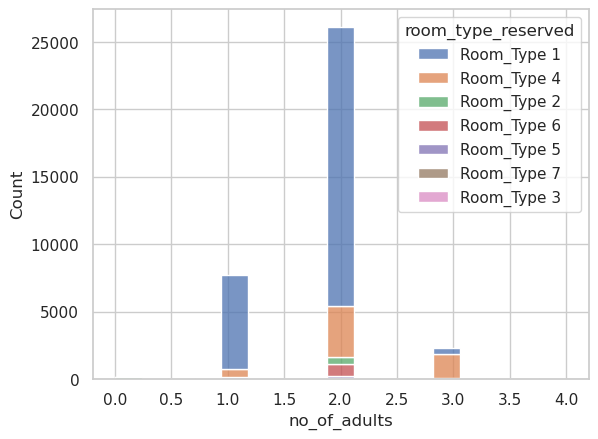

In [104]:
sns.histplot(data=fichierhotel, x="no_of_adults", hue="room_type_reserved", multiple="stack")
plt.show()

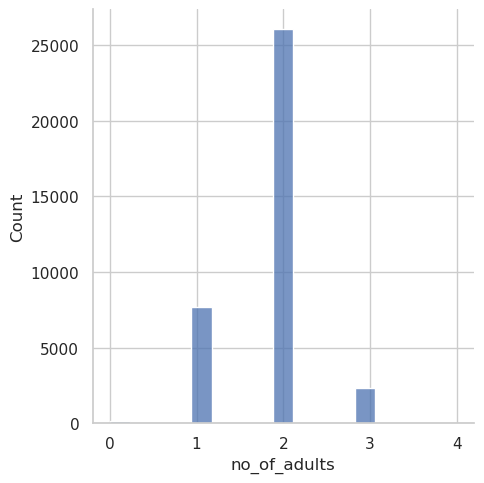

In [112]:
sns.displot(data=fichierhotel, x="no_of_adults")
plt.show()

In [111]:
fichierhotel.no_of_adults

0        2
1        2
2        1
3        2
4        2
        ..
36270    3
36271    2
36272    2
36273    2
36274    2
Name: no_of_adults, Length: 36275, dtype: int64

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


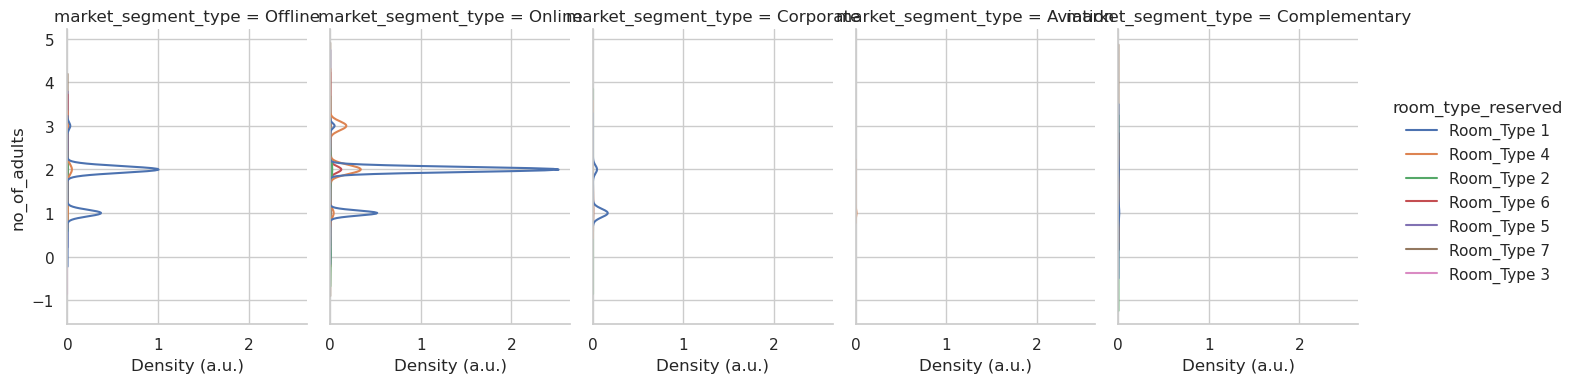

In [118]:
g = sns.displot(
    data=fichierhotel, y="no_of_adults", hue="room_type_reserved", col="market_segment_type",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "no_of_adults")
#g.set_titles("{room_type_reserved}")
plt.show()

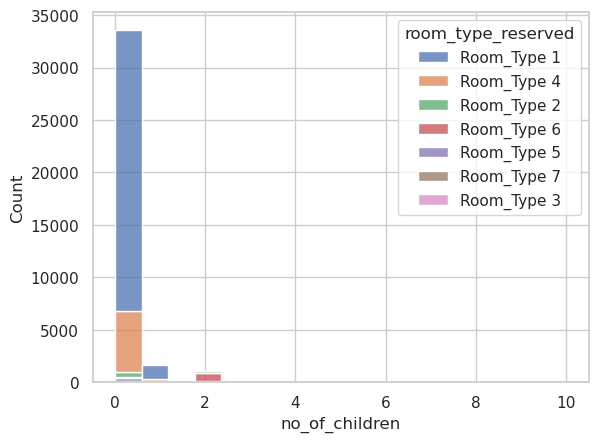

In [120]:
sns.histplot(data=fichierhotel, x="no_of_children", hue="room_type_reserved", multiple="stack")
plt.show()

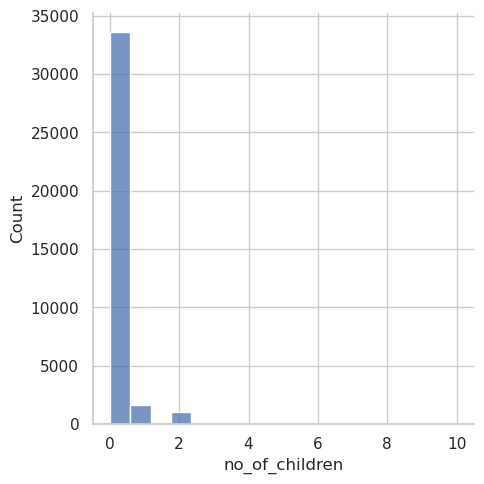

In [122]:
sns.displot(data=fichierhotel, x="no_of_children")
plt.show()

## Conclusion

In [123]:
# Les données fournies ne sont pas contextualisées D'où l'importance d'avoir plus de données sur une période plus longue 
# Les habitudes de consommation des clients ont radicalement changé Les enfants sont des geeks
# L'ubérisation de l'économie mondiale a ouvert la voie à une nouvelle
# manière de voyager et de nouvelles stratégies commerciales